In [2]:
import pandas as pd

#Ramps_0.csv
ramps_0_df = pd.read_csv("../data/Ramps_0.csv")

In [3]:
ramps_0_df.shape

(26161, 44)

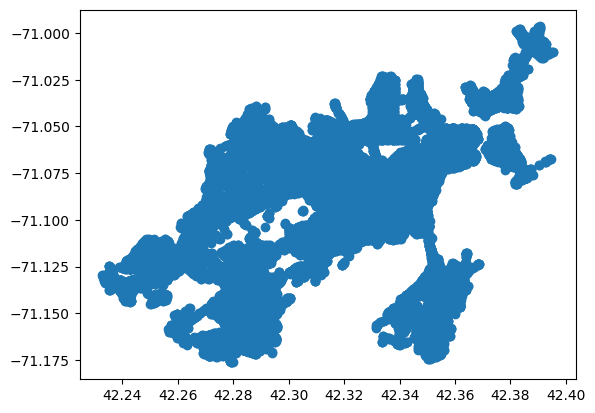

In [5]:
import matplotlib.pyplot as plt

plt.scatter(x = ramps_0_df['y'], y = ramps_0_df['x'])

In [7]:
ramps_0_df.rename(columns = {'x': 'Longitude', 'y': 'Latitude'}, inplace = True)
ramps_0_df.rename(columns = {'x': 'Longitude', 'y': 'Latitude'}, inplace = True)

In [9]:
ramps_0_df.head()

,FID,ObjectID,ObjectID_1,CREEC_Type,CREEC_Posi,RAMP_MATL,THR_WIDTH,LAND_EXIST,LANDING_SL,LANDING_CO,...,I_NEARFID,PARC_ID,AT_INT,NEAR_ANGLE,Bearing,Dwy,RAMP_ID_1,Ramp_ID_d,Longitude,Latitude
0,1,1249,1249,Parallel,Uni-Directional,Portland Cement Concrete,4.0,Yes,2.3,Excellent (Like new),...,5824,,Y,0.0,255.310939,,8998.1,8998.1,-71.165906,42.341852
1,2,823,823,Parallel,Uni-Directional,Portland Cement Concrete,4.0,Yes,9.7,Fair (Minor/Hairline damage with no impact to ...,...,3021,,Y,0.0,3.625703,,5999.1,5999.1,-71.055954,42.365543
2,3,1250,1250,Perpendicular,Uni-Directional,Portland Cement Concrete,4.5,Yes,1.9,Excellent (Like new),...,2099,,Y,0.0,147.404378,,4375.2,4375.2,-71.137155,42.349207
3,4,824,824,Parallel,Uni-Directional,Portland Cement Concrete,4.0,,0.0,,...,3421,,Y,0.0,265.705311,,6880.1,6880.1,-71.055531,42.365034
4,5,1251,1251,Perpendicular,Uni-Directional,Portland Cement Concrete,5.0,Yes,2.5,Fair (Minor/Hairline damage with no impact to ...,...,2099,,Y,0.0,70.955876,,4375.1,4375.1,-71.137100,42.349289


In [11]:
from geopy.geocoders import Nominatim
from geopy.point import Point
import numpy as np

geolocator = Nominatim(user_agent = "test")

def reverse_geocoding(latitude, longitude):
    try:
        location = geolocator.reverse(Point(latitude, longitude))
        return location.raw['display_name']
    except:
        return None

ramps_0_df['address'] = np.vectorize(reverse_geocoding)(ramps_0_df['Latitude'], ramps_0_df['Longitude'])

print(ramps_0_df)

         FID  ObjectID  ObjectID_1     CREEC_Type       CREEC_Posi  \
0          1      1249        1249       Parallel  Uni-Directional   
1          2       823         823       Parallel  Uni-Directional   
2          3      1250        1250  Perpendicular  Uni-Directional   
3          4       824         824       Parallel  Uni-Directional   
4          5      1251        1251  Perpendicular  Uni-Directional   
...      ...       ...         ...            ...              ...   
26156  26157     28243       28243  Perpendicular  Uni-Directional   
26157  26158     28244       28244    Combination  Uni-Directional   
26158  26159     28245       28245  Perpendicular  Uni-Directional   
26159  26160     28246       28246       Diagonal         Diagonal   
26160  26161     28247       28247       Parallel  Uni-Directional   

                      RAMP_MATL  THR_WIDTH LAND_EXIST  LANDING_SL  \
0      Portland Cement Concrete        4.0        Yes         2.3   
1      Portland Cemen

In [12]:
ramps_0_df.columns

Index(['FID', 'ObjectID', 'ObjectID_1', 'CREEC_Type', 'CREEC_Posi',
       'RAMP_MATL', 'THR_WIDTH', 'LAND_EXIST', 'LANDING_SL', 'LANDING_CO',
       'APRON_SL', 'LFLARE_SL', 'DWP_MATL', 'DWP_COND', 'GUTTER_SL',
       'GUTTER_CS', 'LIP', 'CROSS_', 'RFLARE_SL', 'SAFE_ZONE_', 'RAMP_OBSTR',
       'FLARE_OBST', 'APRON_CROS', 'Crosswalk_', 'RAMP_COND', 'ADA_Compli',
       'Photo', 'ObjectID_3', 'Failure_Ty', 'Failure_La', 'NEAR_FID',
       'NEAR_DIST', 'INT_ID', 'I_NEARDIST', 'I_NEARFID', 'PARC_ID', 'AT_INT',
       'NEAR_ANGLE', 'Bearing', 'Dwy', 'RAMP_ID_1', 'Ramp_ID_d', 'Longitude',
       'Latitude', 'address'],
      dtype='object')

In [134]:
# Save it to the new file
ramps_0_df.to_csv("../data/Ramps_0_Updated.csv")

In [50]:
ramps_0_df['postal'] = ramps_0_df['address'].str.split(",").str[-2].str.strip()


In [82]:
ramps_0_df['address'][10000]

'33, Alveston Street, Jamaica Plain, Boston, Suffolk County, Massachusetts, 02130, United States'

In [84]:
ramps_0_df['neighborhood'] = ramps_0_df['address'].str.split(",").str[-6].str.strip()


In [89]:
ramps_0_df.head()

,FID,ObjectID,ObjectID_1,CREEC_Type,CREEC_Posi,RAMP_MATL,THR_WIDTH,LAND_EXIST,LANDING_SL,LANDING_CO,...,NEAR_ANGLE,Bearing,Dwy,RAMP_ID_1,Ramp_ID_d,Longitude,Latitude,address,postal,neighborhood
0,1,1249,1249,Parallel,Uni-Directional,Portland Cement Concrete,4.0,Yes,2.3,Excellent (Like new),...,0.0,255.310939,,8998.1,8998.1,-71.165906,42.341852,"Boston College (Brighton Campus), Undine Road,...",02138,Brighton
1,2,823,823,Parallel,Uni-Directional,Portland Cement Concrete,4.0,Yes,9.7,Fair (Minor/Hairline damage with no impact to ...,...,0.0,3.625703,,5999.1,5999.1,-71.055954,42.365543,"6, Margaret Street, North End, Boston, Suffolk...",02113,North End
2,3,1250,1250,Perpendicular,Uni-Directional,Portland Cement Concrete,4.5,Yes,1.9,Excellent (Like new),...,0.0,147.404378,,4375.2,4375.2,-71.137155,42.349207,"132, Glenville Avenue, Allston Village, Allsto...",02134,Allston
3,4,824,824,Parallel,Uni-Directional,Portland Cement Concrete,4.0,,0.0,,...,0.0,265.705311,,6880.1,6880.1,-71.055531,42.365034,"1, Noyes Place, North End, Boston, Suffolk Cou...",02113,North End
4,5,1251,1251,Perpendicular,Uni-Directional,Portland Cement Concrete,5.0,Yes,2.5,Fair (Minor/Hairline damage with no impact to ...,...,0.0,70.955876,,4375.1,4375.1,-71.137100,42.349289,"139, Glenville Avenue, Allston Village, Allsto...",02134,Allston


In [63]:
ramps_0_df[ramps_0_df['postal'].isna()]['RAMP_COND']

58      Excellent (Like new)
8098    Excellent (Like new)
8206    Excellent (Like new)
Name: RAMP_COND, dtype: object

In [90]:
ramps_0_df['RAMP_COND'].value_counts()

Excellent (Like new)                                                   15119
Fair (Minor/Hairline damage with no impact to accessibility)            6241
                                                                        4136
Poor (Panel is damaged and affecting functionality- to be replaced)      665
Name: RAMP_COND, dtype: int64

In [96]:
ramps_0_df[ramps_0_df['RAMP_COND'].str.contains("Poor")]

,FID,ObjectID,ObjectID_1,CREEC_Type,CREEC_Posi,RAMP_MATL,THR_WIDTH,LAND_EXIST,LANDING_SL,LANDING_CO,...,NEAR_ANGLE,Bearing,Dwy,RAMP_ID_1,Ramp_ID_d,Longitude,Latitude,address,postal,neighborhood
87,88,1338,1338,Perpendicular,Uni-Directional,Portland Cement Concrete,5.0,Yes,0.4,Poor (Panel is damaged and affecting functiona...,...,0.0,249.230123,,4330.2,4330.2,-71.100435,42.308318,"83, Glen Road, Roxbury, Boston, Suffolk County...",02130,Roxbury
101,102,1352,1352,Parallel,Uni-Directional,Portland Cement Concrete,4.0,Yes,2.4,Poor (Panel is damaged and affecting functiona...,...,0.0,240.031762,,158.3,158.3,-71.137527,42.283644,"4, Hillock Street, Bellevue, Roslindale, Bosto...",02131,Roslindale
111,112,1362,1362,Parallel,Uni-Directional,Portland Cement Concrete,4.0,Yes,2.8,Poor (Panel is damaged and affecting functiona...,...,0.0,104.127389,,370.1,370.1,-71.137157,42.293323,"120, Ardale Street, Bellevue, Roslindale, Bost...",02131,Roslindale
121,122,1373,1373,Diagonal,Diagonal,Portland Cement Concrete,4.0,Yes,1.8,Poor (Panel is damaged and affecting functiona...,...,0.0,89.722010,,1904.2,1904.2,-71.144303,42.288212,"1082, South Street, Bellevue, Roslindale, Bost...",02131,Roslindale
139,140,1392,1392,Perpendicular,Uni-Directional,Portland Cement Concrete,4.5,Yes,0.7,Excellent (Like new),...,0.0,342.801544,,6196.1,6196.1,-71.125082,42.276851,"415, Poplar Street, Clarendon Hills, Roslindal...",02131,Roslindale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25685,25686,27336,27336,Combination,Uni-Directional,Portland Cement Concrete,4.5,Yes,1.2,Excellent (Like new),...,0.0,266.793306,,8952.1,8952.1,-71.118491,42.252588,"Fairmont Ave @ Truman Hwy, Fairmount Avenue, F...",02137,Hyde Park
25735,25736,27386,27386,Parallel,Uni-Directional,Bituminous Concrete,6.0,Yes,2.1,Poor (Panel is damaged and affecting functiona...,...,0.0,183.242867,,1812172000.3,1812172000.3,-71.138888,42.248835,"76, Turtle Pond Parkway, Stonybrook Village, H...",02136,Hyde Park
25815,25816,27466,27466,Parallel,Uni-Directional,Portland Cement Concrete,5.0,,0.0,,...,0.0,319.070243,,1904313000.1,1904313000.1,-71.115117,42.287468,"19, Quarley Road, Roslindale, Boston, Suffolk ...",02131,Roslindale
25820,25821,27471,27471,Parallel,Uni-Directional,Bituminous Concrete,5.0,,0.0,,...,0.0,12.847106,,2303.1,2303.1,-71.070839,42.323535,"15, Clifton Street, Roxbury, Boston, Suffolk C...",02119,Roxbury


In [164]:
import folium
import pandas as pd

#create a map
poor_map = folium.Map(prefer_canvas = True)

def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location = [point.Latitude, point.Longitude],
                        radius = 2,
                        weight = 5).add_to(poor_map)

# use df.apply(,axis=1) to "iterate" through every row in your dataframe

# temp = ramps_0_df.head(100)

poor_condition = ramps_0_df[ramps_0_df['RAMP_COND'].str.contains("Poor")]
poor_condition.apply(plotDot, axis = 1)

#Set the zoom to the maximum possible
poor_map.fit_bounds(poor_map.get_bounds())

poor_map.save("../maps/ramps_0/poor_location.html")


In [165]:
import folium
import pandas as pd

#create a map
excellent_map = folium.Map(prefer_canvas = True)

def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location = [point.Latitude, point.Longitude],
                        radius = 2,
                        weight = 5).add_to(excellent_map)

# use df.apply(,axis=1) to "iterate" through every row in your dataframe

# temp = ramps_0_df.head(100)

excellent_condition = ramps_0_df[ramps_0_df['RAMP_COND'].str.contains("Excellent")]
excellent_condition.apply(plotDot, axis = 1)

#Set the zoom to the maximum possible
excellent_map.fit_bounds(excellent_map.get_bounds())

excellent_map.save("../maps/ramps_0/excellent_location.html")

In [166]:
import folium
import pandas as pd

#create a map
fair_map = folium.Map(prefer_canvas = True)

def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location = [point.Latitude, point.Longitude],
                        radius = 2,
                        weight = 5).add_to(fair_map)

# use df.apply(,axis=1) to "iterate" through every row in your dataframe

# temp = ramps_0_df.head(100)

fair_condition = ramps_0_df[ramps_0_df['RAMP_COND'].str.contains("Fair")]
fair_condition.apply(plotDot, axis = 1)

#Set the zoom to the maximum possible
fair_map.fit_bounds(fair_map.get_bounds())

fair_map.save("../maps/ramps_0/fair_location.html")

In [155]:
top_5_excellent = ramps_0_df[ramps_0_df['RAMP_COND'].str.contains("Excellent")][['neighborhood', 'postal']].value_counts().head()
top_5_excellent = top_5_excellent.to_frame().reset_index()
top_5_excellent = top_5_excellent.rename(columns = {0: "count"})
top_5_excellent

,neighborhood,postal,count
0,West Roxbury,02132,891
1,South Boston,02127,888
2,Roxbury,02119,816
3,Roslindale,02131,679
4,Dorchester,02124,659


In [154]:
top_5_fair = ramps_0_df[ramps_0_df['RAMP_COND'].str.contains("Fair")][['neighborhood', 'postal']].value_counts().head()
top_5_fair = top_5_fair.to_frame().reset_index()
top_5_fair = top_5_fair.rename(columns = {0: "count"})
top_5_fair


,neighborhood,postal,count
0,Mattapan,02126,414
1,Dorchester,02124,389
2,East Boston,02128,345
3,South Boston,02127,270
4,Charlestown,02129,269


In [156]:
top_5_poor = ramps_0_df[ramps_0_df['RAMP_COND'].str.contains("Poor")][['neighborhood', 'postal']].value_counts().head()
top_5_poor = top_5_poor.to_frame().reset_index()
top_5_poor = top_5_poor.rename(columns = {0: "count"})
top_5_poor

,neighborhood,postal,count
0,Roslindale,02131,50
1,Roxbury,02119,43
2,Dorchester,02122,42
3,Hyde Park,02136,42
4,South Boston,02127,37


In [160]:
top_5_excellent.compare(top_5_fair)

neighborhood               postal        count      
           self         other   self  other  self other
0  West Roxbury      Mattapan  02132  02126   891   414
1  South Boston    Dorchester  02127  02124   888   389
2       Roxbury   East Boston  02119  02128   816   345
3    Roslindale  South Boston  02131  02127   679   270
4    Dorchester   Charlestown  02124  02129   659   269